In [1]:
import pandas as pd
from Classification_library import Learning_rocks


# Проверяем устройство
device = 'cuda'
print(f"Выбрано устройство: {device}")  

BATCH_SIZE = 256
NUM_EPOCHS = 20
NUM_WORKERS = 16



data = pd.read_csv('rock_patches.csv')

df = [
    [6, 0, 0, 1, 1, 0, 'Кальциевый'],
    [9, 0, 1, 1, 1, 0, 'Кальциевый'],
    [10, 1, 0, 1, 0, 1, 'Кальциевый'],
    [11, 0, 1, 0, 1, 1, 'Уратный + кальций'],
    [12, 0, 1, 1, 1, 0, 'Уратный + кальций'],
    [16, 1, 0, 0, 0, 1, 'Кальциевый'],
    [18, 0, 1, 0, 1, 1, 'Уратный + кальций'],
    [19, 1, 1, 0, 1, 0, 'Уратный + кальций'],
    [25, 0, 1, 0, 1, 1, 'Уратный + кальций'],
    [27, 1, 0, 1, 1, 0, 'Уратный + кальций'],
    [28, 1, 0, 1, 1, 0, 'Уратный + кальций'],
    [30, 0, 0, 1, 1, 1, 'Кальциевый'],
    [32, 1, 0, 1, 1, 0, 'Уратный + кальций'],
    [35, 0, 1, 1, 1, 0, 'Уратный + кальций'],
    [43, 1, 0, 0, 0, 1, 'Кальциевый'],
    [51, 1, 1, 0, 0, 1, 'Кальциевый']
]

columns = [
    "stone_id",          # камень (идентификатор камня)
    "smooth_shape",      # Гладкая форма
    "sharp_edges",       # Острые острые углы → острые края
    "porous",            # Пористый
    "layered",           # Слоистый
    "solid",
    'type'# Сплошной
]



Выбрано устройство: cuda


In [2]:
import pandas as pd 

df=pd.DataFrame(data=df, columns=columns)
df

,stone_id,smooth_shape,sharp_edges,porous,layered,solid,type
0,6,0,0,1,1,0,Кальциевый
1,9,0,1,1,1,0,Кальциевый
2,10,1,0,1,0,1,Кальциевый
3,11,0,1,0,1,1,Уратный + кальций
4,12,0,1,1,1,0,Уратный + кальций
5,16,1,0,0,0,1,Кальциевый
6,18,0,1,0,1,1,Уратный + кальций
7,19,1,1,0,1,0,Уратный + кальций
8,25,0,1,0,1,1,Уратный + кальций
9,27,1,0,1,1,0,Уратный + кальций


In [3]:

df.to_excel('stones.xlsx', index=False)

In [4]:
path = './models'

In [5]:
classification_df =  pd.DataFrame(df, columns=columns)

type_data = data.copy()
type_data.shape
type_data.head()
type_shape = dict(zip(classification_df['stone_id'], classification_df['type']))
type_data['rock_type'] = type_data['rock_type'].map(type_shape)


In [6]:
type_data

,path,rock_type
0,./Stone 32 filtered_v1/Rock32_1894_filtered.png,Уратный + кальций
1,./Stone 32 filtered_v1/Rock32_2119_filtered.png,Уратный + кальций
2,./Stone 32 filtered_v1/Rock32_718_filtered.png,Уратный + кальций
3,./Stone 32 filtered_v1/Rock32_209_filtered.png,Уратный + кальций
4,./Stone 32 filtered_v1/Rock32_1747_filtered.png,Уратный + кальций
...,...,...
24952,./Stone 25 filtered_v1/Rock25_1386_filtered.png,Уратный + кальций
24953,./Stone 25 filtered_v1/Rock25_1073_filtered.png,Уратный + кальций
24954,./Stone 25 filtered_v1/Rock25_235_filtered.png,Уратный + кальций
24955,./Stone 25 filtered_v1/Rock25_794_filtered.png,Уратный + кальций


In [7]:
type_shape = Learning_rocks(df = type_data, device = device, model_name = f'{path}type_model.pth', BATCH_SIZE = 256, num_ep = 20)



Раскоментить при обучении

In [8]:
#type_shape.learn_model()

In [9]:

type_shape.idx_output()

{0: 'Кальциевый', 1: 'Уратный + кальций'}

In [10]:
type_shape.clear_memory()

In [11]:
type_shape.idx_output()


{0: 'Кальциевый', 1: 'Уратный + кальций'}

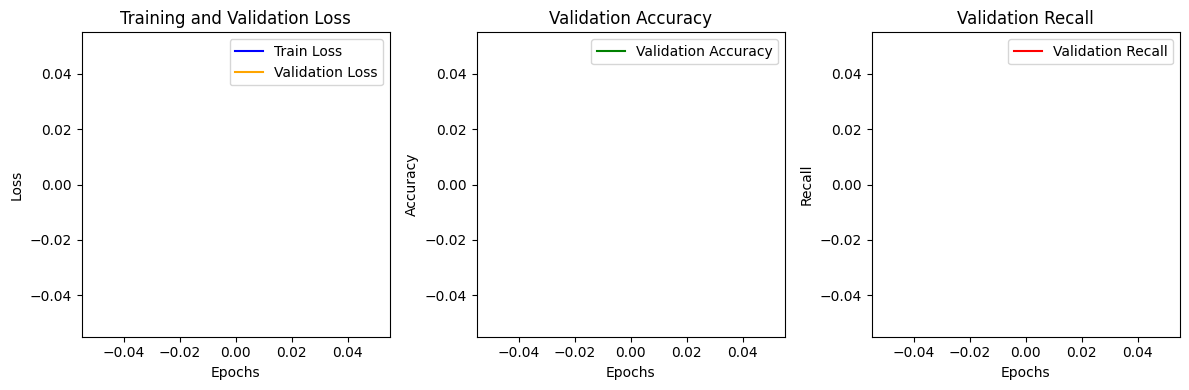

In [12]:
type_shape.output_met()